In [31]:
from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 

In [32]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [33]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


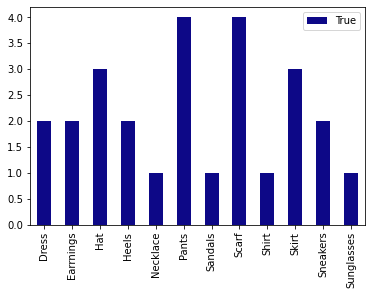

In [34]:
D=df[df['Dress']==1]['Dress'].value_counts()
E=df[df['Earrings']==1]['Earrings'].value_counts()
H=df[df['Hat']==1]['Hat'].value_counts()
He=df[df['Heels']==1]['Heels'].value_counts()
N=df[df['Necklace']==1]['Necklace'].value_counts()
P=df[df['Pants']==1]['Pants'].value_counts()
Sa=df[df['Sandals']==1]['Sandals'].value_counts()
Sc=df[df['Scarf']==1]['Scarf'].value_counts()
Sh=df[df['Shirt']==1]['Shirt'].value_counts()
Sk=df[df['Skirt']==1]['Skirt'].value_counts()
Sn=df[df['Sneakers']==1]['Sneakers'].value_counts()
Su=df[df['Sunglasses']==1]['Sunglasses'].value_counts()
df_plot  = pd.DataFrame([D,E,H,He,N,P,Sa,Sc,Sh,Sk,Sn,Su])
df_plot.index=['Dress','Earrnings','Hat','Heels','Necklace','Pants','Sandals','Scarf','Shirt','Skirt','Sneakers','Sunglasses']
df_plot.plot(kind='bar',stacked=True,colormap="plasma");

In [35]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


In [36]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [37]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf


# Importing the dataset

In [38]:
from csv import reader
dataframe=[]
with open('Market_Basket_Optimisation.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        dataframe.append(row)

In [39]:
te=TransactionEncoder()
te_ary=te.fit(dataframe).transform(dataframe)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
print(df.head())
df.describe()

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
count,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,...,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7500,7348,7434,7466,7251,7467,7436,7420,7394,7432,...,7032,7308,7498,7377,7431,7280,7062,7415,7296,7430


In [40]:
df.sum()

 asparagus             1
almonds              153
antioxydant juice     67
asparagus             35
avocado              250
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  86
yogurt cake          205
zucchini              71
Length: 120, dtype: int64

In [41]:
frequent_itemsets=apriori(df, min_support=0.1,use_colnames=True) 
frequent_itemsets.sort_values("support", ascending = False)

,support,itemsets
5,0.238368,(mineral water)
1,0.179709,(eggs)
6,0.174110,(spaghetti)
2,0.170911,(french fries)
0,0.163845,(chocolate)
3,0.132116,(green tea)
4,0.129583,(milk)


<AxesSubplot:title={'center':'Frequent items'}>

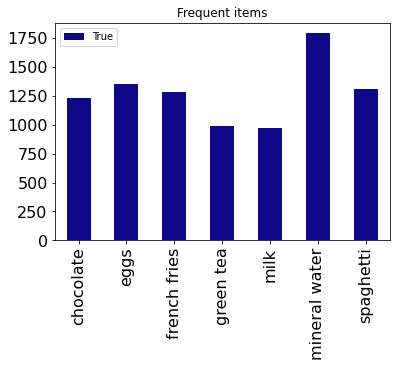

In [42]:
prod=[]
prod_label=['chocolate','eggs','french fries','green tea','milk','mineral water','spaghetti']
for i in prod_label:
    
        p=df[df[i]==1][i].value_counts()
        p_n=i
        prod.append(p)
               
df_plot = pd.DataFrame(prod)
df_plot.index=prod_label
df_plot.plot(kind='bar',stacked=True,colormap="plasma",fontsize=16,title="Frequent items")

In [46]:
frequent_itemsets=apriori(df, min_support=0.04,use_colnames=True) 
frequent_itemsets.sort_values("support", ascending = False)

,support,itemsets
20,0.238368,(mineral water)
7,0.179709,(eggs)
26,0.174110,(spaghetti)
9,0.170911,(french fries)
4,0.163845,(chocolate)
14,0.132116,(green tea)
19,0.129583,(milk)
15,0.098254,(ground beef)
12,0.095321,(frozen vegetables)
22,0.095054,(pancakes)


- The most popular item in this data set is mineral water followed by eggs and spaghetti

In [51]:
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
4,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
5,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
7,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
8,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


   - It's more likely to buy ground beef with mineral water rather than buying only mineral water or only ground beef same for milk and mineral water, mineral water and spaghetti, mineral water and chocolate, spaghetti and mineral water.
   - The probability of buying mineral water after buying ground beef = 0.42%